# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fikri Rivandi
- **Email:** fixri2104@gmail.com
- **ID Dicoding:** fundayyy

## Menentukan Pertanyaan Bisnis

Data yang akan dianalisis adalah data dari perusahan **Olist E-Commerce**, berikut pertanyaan bisnis yang bisa dirumuskan dari data-data yang ada:
1. Bagaimana performa penjualan dan revenue Olist E-Commerce dalam beberapa bulan terakhir?
2. Kategori produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang Olist E-Commerce miliki?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
import pandas as pd

customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation.head()

products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Hal pertama yang saya lakukan adalah meng-*import* *library* yang dibutuhkan yaitu **pandas**.
- Kemudian saya mulai mengambil data CSV yang akan digunakan dengan `read_csv()`.

### Assessing Data

In [9]:
import pandas as pd

def check_data(df):
  print(df.head())
  print(df.info())

  print("miss value:")
  print(df.isna().sum())

  print("duplicated value:", df.duplicated().sum())


customers_df = pd.read_csv("data/customers_dataset.csv")
check_data(customers_df) # -> data bersih

geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
check_data(geolocation_df) # -> ada banyak duplikasi

order_items_df = pd.read_csv("data/order_items_dataset.csv")
check_data(order_items_df) # -> data bersih

order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
check_data(order_payments_df) # -> data bersih

order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
check_data(order_reviews_df) # -> data bersih (ada yang miss value, namun merupakan kolom opsional)

orders_df = pd.read_csv("data/orders_dataset.csv")
check_data(orders_df) # -> data belum bersih (ada yang miss value, karena status order mempengaruhi beberapa kolom dan tanggal masih bertipe data object)

sellers_df = pd.read_csv("data/sellers_dataset.csv")
check_data(sellers_df) # -> data bersih

product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")
check_data(product_category_name_translation) # -> data bersih

products_df = pd.read_csv("data/products_dataset.csv")
check_data(products_df) # -> ada data yang miss value, jumlahnya tidak terlalu banyak, nama kategori produk juga belum di-translate

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count

**Insight:**
- Saya membuat fungsi `check_data()` untuk mengecek setiap data yang ada.
- Setiap data akan saya cek duplikasinya, mencari *miss value*-nya.
- Setelah melakukan pengecekan pada setiap data, berikut beberapa informasi yang saya dapatkan:
  - **Geolocation**: Ada banyak duplikasi
  - **Order Reviews**: Ada yang *miss value*, namun merupakan kolom opsional
  - **Orders**: Ada yang *miss value*, karena status order mempengaruhi beberapa kolom dan tanggal masih bertipe data `object`
  - **Products**: ada data yang *miss value*, jumlahnya tidak terlalu banyak, nama kategori produk juga belum di-*translate*
  - Sisanya adalah data bersih, yang artinya siap digunakan

### Cleaning Data

In [10]:
import pandas as pd

def check_data(df):
  print(df.head())
  print(df.info())

  print("miss value:")
  print(df.isna().sum())

  print("duplicated value:", df.duplicated().sum())


customers_df = pd.read_csv("data/customers_dataset.csv")
# check_data(customers_df) # -> data bersih

geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
# check_data(geolocation_df) # -> ada banyak duplikasi
geolocation_df.drop_duplicates(inplace=True) # hapus semua duplikasi
# check_data(geolocation_df) # -> data sudah bersih

order_items_df = pd.read_csv("data/order_items_dataset.csv")
# check_data(order_items_df) # -> data bersih

order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
# check_data(order_payments_df) # -> data bersih

order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
# check_data(order_reviews_df) # -> data bersih (ada yang miss value, namun merupakan kolom opsional)

orders_df = pd.read_csv("data/orders_dataset.csv")
# check_data(orders_df) # -> data belum bersih (ada yang miss value, karena status order mempengaruhi beberapa kolom dan tanggal masih bertipe data object)
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
# check_data(orders_df) # -> data sudah bersih

sellers_df = pd.read_csv("data/sellers_dataset.csv")
# check_data(sellers_df) # -> data bersih

product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")
# check_data(product_category_name_translation) # -> data bersih

products_df = pd.read_csv("data/products_dataset.csv")
# check_data(products_df) # -> ada data yang miss value, jumlahnya tidak terlalu banyak, nama kategori produk juga belum di-translate
products_df.dropna(inplace=True)
# check_data(products_df) # -> data sudah bersih

**Insight:**

Setiap kesalahan data yang saya temui di proses **Assessing Data** saya perbaiki/bersihkan agar dapat digunakan dengan baik.

- **Geolocation**: Ada banyak duplikasi
  ```
  geolocation_df.drop_duplicates(inplace=True) # hapus semua duplikasi
  ```
- **Orders**: Ada yang *miss value*, karena status order mempengaruhi beberapa kolom dan tanggal masih bertipe data `object`
  ```
  datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
  for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])
  ```
- **Products**: ada data yang *miss value*, jumlahnya tidak terlalu banyak, nama kategori produk juga belum di-*translate*
  ```
  products_df.dropna(inplace=True)
  ```


## Exploratory Data Analysis (EDA)

### Explore ...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_data(df):
  print(df.head())
  print(df.info())

  print("miss value:")
  print(df.isna().sum())

  print("duplicated value:", df.duplicated().sum())

def desc_data(df):
  df.describe(include="all")


customers_df = pd.read_csv("data/customers_dataset.csv")
# check_data(customers_df) # -> data bersih

# geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
# check_data(geolocation_df) # -> ada banyak duplikasi
# geolocation_df.drop_duplicates(inplace=True) # hapus semua duplikasi
# check_data(geolocation_df) # -> data sudah bersih (data tidak digunakan)

order_items_df = pd.read_csv("data/order_items_dataset.csv")
# check_data(order_items_df) # -> data bersih

# order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
# check_data(order_payments_df) # -> data bersih (data tidak digunakan)

# order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
# check_data(order_reviews_df) # -> data bersih (ada yang miss value, namun merupakan kolom opsional, data tidak digunakan)

orders_df = pd.read_csv("data/orders_dataset.csv")
# check_data(orders_df) # -> data belum bersih (ada yang miss value, karena status order mempengaruhi beberapa kolom dan tanggal masih bertipe data object)
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
# check_data(orders_df) # -> data sudah bersih

# sellers_df = pd.read_csv("data/sellers_dataset.csv")
# check_data(sellers_df) # -> data bersih (data tidak digunakan)

product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")
# check_data(product_category_name_translation) # -> data bersih

products_df = pd.read_csv("data/products_dataset.csv")
# check_data(products_df) # -> ada data yang miss value, jumlahnya tidak terlalu banyak, nama kategori produk juga belum di-translate
products_df.dropna(inplace=True)
# check_data(products_df) # -> data sudah bersih




# == explore customer dataset ==
# melihat sebaran customer Olist berdasarkan kota (city)
customers_count_by_city_df = customers_df.groupby(by="customer_city").customer_id.nunique().reset_index().rename(columns={
    "customer_id": "customers_count"
})
# melihat kota paling banyak yang memiliki pengguna Olist
customers_count_by_city_df.sort_values(by="customers_count", ascending=False)

# melihat sebaran customer Olist berdasarkan state
customers_count_by_state_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index().rename(columns={
    "customer_id": "customers_count"
})
# melihat state paling banyak yang memiliki pengguna Olist
customers_count_by_state_df.sort_values(by="customers_count", ascending=False)
# == explore customer dataset ==



# == explore order_items dataset ==
order_items_df.describe()
# melihat banyaknya order dan revenue berdasarkan order_item_id
order_items_grouped_df = order_items_df.groupby(by="order_item_id").agg({
    "order_id": "nunique",
    "price": "sum",
    "freight_value": "sum",
})
order_items_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
order_items_grouped_df["total_revenue"] = order_items_grouped_df["total_price"] + order_items_grouped_df["total_shipping"]
order_items_grouped_df.sort_values(by="order_count", ascending=False)
# == explore order_items dataset ==



# # == explore orders & customer dataset ==
# mencari tau apakah ada user yang belum pernah melakukan order / transaksi
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.groupby(by="status").customer_id.count()
# # == explore orders & customer dataset ==



# == explore orders & order_items dataset ==
order_items_with_order_data_df = pd.merge(
    left=order_items_df,
    right=orders_df,
    how="left",
    on="order_id"
)
order_items_with_order_data_grouped_df = order_items_with_order_data_df.groupby(by="customer_id").agg({
    "order_id": "count",
    "price": "sum",
    "freight_value": "sum",
})
order_items_with_order_data_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
order_items_with_order_data_grouped_df["total_revenue"] = order_items_with_order_data_grouped_df["total_price"] + order_items_with_order_data_grouped_df["total_shipping"]
order_items_with_order_data_grouped_df.sort_values(by="order_count", ascending=False)
order_items_with_order_data_grouped_df.sort_values(by="total_revenue", ascending=False)
# == explore orders & order_items dataset ==



# == explore orders, order_items, dan customers dataset ==
order_items_with_order_data_and_customer_data_df = pd.merge(
    left=order_items_with_order_data_df,
    right=customers_df,
    how="left",
    on="customer_id"
)
order_items_with_order_data_and_customer_data_grouped_df = order_items_with_order_data_and_customer_data_df.groupby(by="customer_city").agg({
    "order_id": "count",
    "price": "sum",
    "freight_value": "sum",
})
order_items_with_order_data_and_customer_data_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
order_items_with_order_data_and_customer_data_grouped_df["total_revenue"] = order_items_with_order_data_and_customer_data_grouped_df["total_price"] + order_items_with_order_data_and_customer_data_grouped_df["total_shipping"]
order_items_with_order_data_and_customer_data_grouped_df.sort_values(by=["order_count", "total_revenue"], ascending=False)

order_items_with_order_data_and_customer_data_grouped_df = order_items_with_order_data_and_customer_data_df.groupby(by="customer_state").agg({
    "order_id": "count",
    "price": "sum",
    "freight_value": "sum",
})
order_items_with_order_data_and_customer_data_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
order_items_with_order_data_and_customer_data_grouped_df["total_revenue"] = order_items_with_order_data_and_customer_data_grouped_df["total_price"] + order_items_with_order_data_and_customer_data_grouped_df["total_shipping"]
order_items_with_order_data_and_customer_data_grouped_df.sort_values(by=["order_count", "total_revenue"], ascending=False)
# == explore orders, order_items, dan customers dataset ==



# == explore products & products_category_name_translation dataset ==
# men-translate nama kategori produk dengan menyatukan data produk dan kategori
products_df = pd.merge(
    left=products_df,
    right=product_category_name_translation,
    how="left",
    on="product_category_name",
)
# == explore products & products_category_name_translation dataset ==



# == explore orders, order_items, dan products dataset ==
order_items_with_order_data_and_product_data_df = pd.merge(
    left=order_items_with_order_data_df,
    right=products_df,
    how="left",
    on="product_id"
)
order_items_with_order_data_and_product_data_grouped_df = order_items_with_order_data_and_product_data_df.groupby(by="product_category_name_english", as_index=False).agg({
    "order_id": "count",
    "price": "sum",
    "freight_value": "sum",
})
order_items_with_order_data_and_product_data_grouped_df.columns = ["product_category", "order_count", "total_price", "total_shipping"]
order_items_with_order_data_and_product_data_grouped_df["total_revenue"] = order_items_with_order_data_and_product_data_grouped_df["total_price"] + order_items_with_order_data_and_product_data_grouped_df["total_shipping"]
order_items_with_order_data_and_product_data_grouped_df.sort_values(by=["order_count"], ascending=False)
order_items_with_order_data_and_product_data_grouped_df.sort_values(by=["total_revenue"], ascending=False)

order_items_with_order_data_and_product_data_grouped_df.corr(numeric_only=True)
# == explore orders, order_items, dan products dataset ==



# export semua data yang sudah di-eksplor
all_df = pd.merge(
    left=order_items_with_order_data_and_product_data_df,
    right=customers_df,
    how='left',
    on="customer_id",
)
all_df.head()
all_df.to_csv("dashboard/main_data.csv", index=False)
# export semua data yang sudah di-eksplor

**Insight:**

Setelah melakukan beberapa eksplorasi data, berikut informasi yang didapat:

- **Customers**
  ```
  # melihat sebaran customer Olist berdasarkan kota (city)
  customers_count_by_city_df = customers_df.groupby(by="customer_city").customer_id.nunique().reset_index().rename(columns={
      "customer_id": "customers_count"
  })
  # melihat kota paling banyak yang memiliki pengguna Olist
  customers_count_by_city_df.sort_values(by="customers_count", ascending=False)
  ```
  **Penjelasan:** Mencari tahu persebaran (demografi) pengguna berdasarkan kota (`customer_city`), hasilnya adalah **sau paulo** menjadi kota yang memiliki paling banyak pengguna Olist E-Commerce
  ```
  # melihat sebaran customer Olist berdasarkan state
  customers_count_by_state_df = customers_df.groupby(by="customer_state").customer_id.nunique().reset_index().rename(columns={
      "customer_id": "customers_count"
  })
  # melihat state paling banyak yang memiliki pengguna Olist
  customers_count_by_state_df.sort_values(by="customers_count", ascending=False)
  ```
  **Penjelasan:** Mencari tahu persebaran (demografi) pengguna berdasarkan *state* (`customer_state`), hasilnya adalah **SP** menjadi *state* yang memiliki paling banyak pengguna Olist E-Commerce
  ****

- **Order Items**
  ```
  # melihat banyaknya order dan revenue berdasarkan order_item_id
  order_items_grouped_df = order_items_df.groupby(by="order_item_id").agg({
      "order_id": "nunique",
      "price": "sum",
      "freight_value": "sum",
  })
  order_items_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
  order_items_grouped_df["total_revenue"] = order_items_grouped_df["total_price"] + order_items_grouped_df["total_shipping"]
  order_items_grouped_df.sort_values(by="order_count", ascending=False)
  ```
  **Penjelasan:** Mencari tahu total pesanan dan total *revenue* perusahaan yang dikelompokkan berdasarkan `order_item_id`, hasilnya adalah `order_item_id = 1` menjadi yang merupakan penyumbang pesanan terbesar dan *revenue* terbesar untuk Olist E-Commerce

- **Orders & Customers**
  ```
  # mencari tau apakah ada user yang belum pernah melakukan order / transaksi
  customer_id_in_orders_df =  orders_df.customer_id.tolist()
  customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
  customers_df.groupby(by="status").customer_id.count()
  ```
  **Penjelasan:** Mencari tahu apakah ada **customer** yang belum pernah membuat pesanan dengan parameter `customer_id` di data **orders**, hasilnya adalah semua **customer** pernah membuat pesanan di Olist E-Commerce
  ****

- **Order Items & Orders**
  ```
  order_items_with_order_data_df = pd.merge(
      left=order_items_df,
      right=orders_df,
      how="left",
      on="order_id"
  )
  order_items_with_order_data_grouped_df = order_items_with_order_data_df.groupby(by="customer_id").agg({
      "order_id": "count",
      "price": "sum",
      "freight_value": "sum",
  })
  order_items_with_order_data_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
  order_items_with_order_data_grouped_df["total_revenue"] = order_items_with_order_data_grouped_df["total_price"] + order_items_with_order_data_grouped_df["total_shipping"]
  order_items_with_order_data_grouped_df.sort_values(by="order_count", ascending=False)
  order_items_with_order_data_grouped_df.sort_values(by="total_revenue", ascending=False)
  ```
  **Penjelasan:** Mencari tahu **customer** yang melakukan pemesanan terbanyak dan menyumbang *revenue* terbanyak perusahaan berdasarkan `customer_id`, hasilnya adalah `customer_id = "fc3d1daec319d62d49bfb5e1f83123e9"` menjadi yang merupakan penyumbang pesanan terbesar, sebanyak **21** dan `customer_id = "1617b1357756262bfa56ab541c47bc16"` menyumbang *revenue* terbesar sebanyak **13664.08** untuk Olist E-Commerce. Dapat disimpulkan juga ternyata jumlah pesanan tidak memastikan total pengeluaran penggunanya jadi yang tertinggi.
  ****

- **Order Items, Orders, dan Customers**
  ```
  order_items_with_order_data_and_customer_data_df = pd.merge(
      left=order_items_with_order_data_df,
      right=customers_df,
      how="left",
      on="customer_id"
  )
  order_items_with_order_data_and_customer_data_grouped_df = order_items_with_order_data_and_customer_data_df.groupby(by="customer_city").agg({
      "order_id": "count",
      "price": "sum",
      "freight_value": "sum",
  })
  order_items_with_order_data_and_customer_data_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
  order_items_with_order_data_and_customer_data_grouped_df["total_revenue"] = order_items_with_order_data_and_customer_data_grouped_df["total_price"] + order_items_with_order_data_and_customer_data_grouped_df["total_shipping"]
  order_items_with_order_data_and_customer_data_grouped_df.sort_values(by=["order_count", "total_revenue"], ascending=False)

  order_items_with_order_data_and_customer_data_grouped_df = order_items_with_order_data_and_customer_data_df.groupby(by="customer_state").agg({
      "order_id": "count",
      "price": "sum",
      "freight_value": "sum",
  })
  order_items_with_order_data_and_customer_data_grouped_df.columns = ["order_count", "total_price", "total_shipping"]
  order_items_with_order_data_and_customer_data_grouped_df["total_revenue"] = order_items_with_order_data_and_customer_data_grouped_df["total_price"] + order_items_with_order_data_and_customer_data_grouped_df["total_shipping"]
  order_items_with_order_data_and_customer_data_grouped_df.sort_values(by=["order_count", "total_revenue"], ascending=False)
  ```
  **Penjelasan:** Mencari tahu **customer** dari **city** dan **state** mana yang melakukan pemesanan terbanyak dan menyumbang *revenue* terbanyak perusahaan berdasarkan `customer_city` dan `customer_state`, hasilnya adalah **sau paulo** menjadi **city** penyumbang pesanan terbesar dan **state** penyumbang *revenue* terbesar adalah **SP**. Dapat disimpulkan bahwa **SP** adalah **state** yang paling mempengaruhi perusahaan.
  ****

- **Products & Product Category Name Translation**
  ```
  # men-translate nama kategori produk dengan menyatukan data produk dan kategori
  products_df = pd.merge(
      left=products_df,
      right=product_category_name_translation,
      how="left",
      on="product_category_name",
  )
  ```
  **Penjelasan:** Awalnya `product_category_name` adalah berbahasa **Brazil**, jadi untuk memudahkan pembacaan, harus mengubah bahasanya menjadi bahasa global (**Inggris**). Untuk itu saya menggabungkan 2 data yaitu **Products & Product Category Name Translation**, dengan parameter `product_category_name`
  ****

- **Order Items, Orders, dan Products**
  ```
  order_items_with_order_data_and_product_data_df = pd.merge(
    left=order_items_with_order_data_df,
    right=products_df,
    how="left",
    on="product_id"
  )
  order_items_with_order_data_and_product_data_grouped_df = order_items_with_order_data_and_product_data_df.groupby(by="product_category_name_english", as_index=False).agg({
      "order_id": "count",
      "price": "sum",
      "freight_value": "sum",
  })
  order_items_with_order_data_and_product_data_grouped_df.columns = ["product_category", "order_count", "total_price", "total_shipping"]
  order_items_with_order_data_and_product_data_grouped_df["total_revenue"] = order_items_with_order_data_and_product_data_grouped_df["total_price"] + order_items_with_order_data_and_product_data_grouped_df["total_shipping"]
  order_items_with_order_data_and_product_data_grouped_df.sort_values(by=["order_count"], ascending=False)
  order_items_with_order_data_and_product_data_grouped_df.sort_values(by=["total_revenue"], ascending=False)
  ```
  **Penjelasan:** Mencari tahu **product** yang terbanyak dipesan dan menyumbang *revenue* terbanyak perusahaan berdasarkan `product_id`, hasilnya adalah **bed_bath_table** menjadi yang merupakan penyumbang pesanan terbesar, sebanyak **11115** dan **health_beauty** menyumbang *revenue* terbesar sebanyak **1441248.07** untuk Olist E-Commerce. Dapat disimpulkan juga ternyata jumlah pesanan tidak memastikan total pengeluaran penggunanya jadi yang tertinggi.
  ```
  order_items_with_order_data_and_product_data_grouped_df.corr(numeric_only=True)
  ```
  **Penjelasan:** Mencari tahu pengaruh antara `order_count`, `total_price`, `total_shipping`, dan `total_revenue` dengan fungsi `corr()` dari library **pandas**. Hasilnya adalah nilai korelasinya adalah 0.9+, yang mana mengatakan bahwa semua nilai diatas sangat saling mempengaruhi satu sama lain.
  ****

- **Ekspor Data**
  ```
  all_df = pd.merge(
    left=order_items_with_order_data_and_product_data_df,
    right=customers_df,
    how='left',
    on="customer_id",
  )
  all_df.head()
  all_df.to_csv("dashboard/main_data.csv", index=False)
  ```
  **Penjelasan:** Data yang sudah dieksplor akhirnya diekspor agar bisa digunakan untuk proses visualisasi menggunakan **Streamlit**

## Visualization & Explanatory Analysis

### Pertanyaan 1:

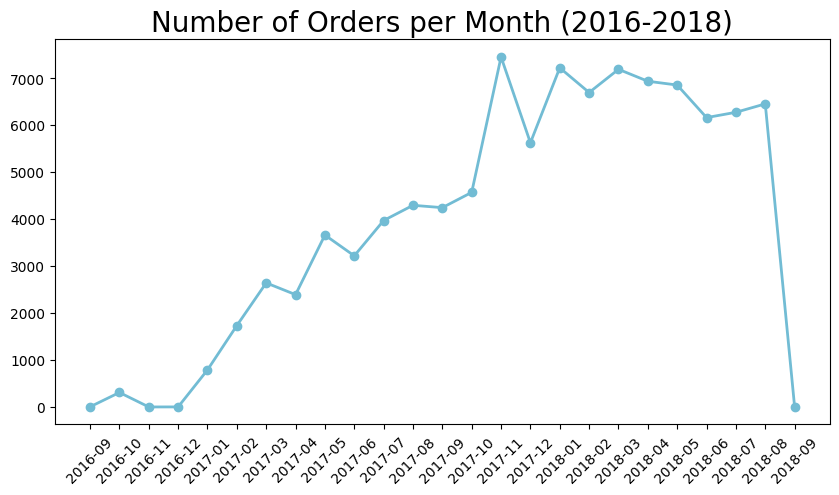

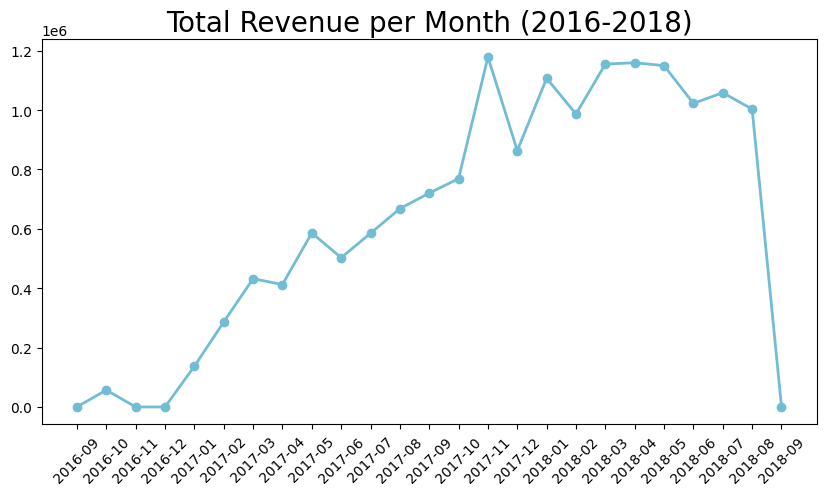

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_df = pd.read_csv("dashboard/main_data.csv")
# all_df.info()

datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_columns:
  all_df[column] = pd.to_datetime(all_df[column])

monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum",
    "freight_value": "sum",
})
monthly_orders_df["revenue"] = monthly_orders_df["price"] + monthly_orders_df["freight_value"]
monthly_orders_df.drop(["price","freight_value"], axis=1, inplace=True)
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
}, inplace=True)
monthly_orders_df.head()

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.show()

**Insight:**

Bagaimana performa penjualan dan revenue Olist E-Commerce dalam beberapa bulan terakhir?
- Untuk menjawab pertanyaan ini, diperlukan *resampling* data berdasarkan `order_purchase_timestamp`
- Kemudian data digrupkan berdasarkan periode (Tahun-Bulan), dan dihitung `order_count` (berdasarkan `order_id` dan `revenue` (didapat dari `price + freight_value`)
- Data yang sudah digrupkan kemudian disajikan dalam bentuk `lineplot`

### Pertanyaan 2:

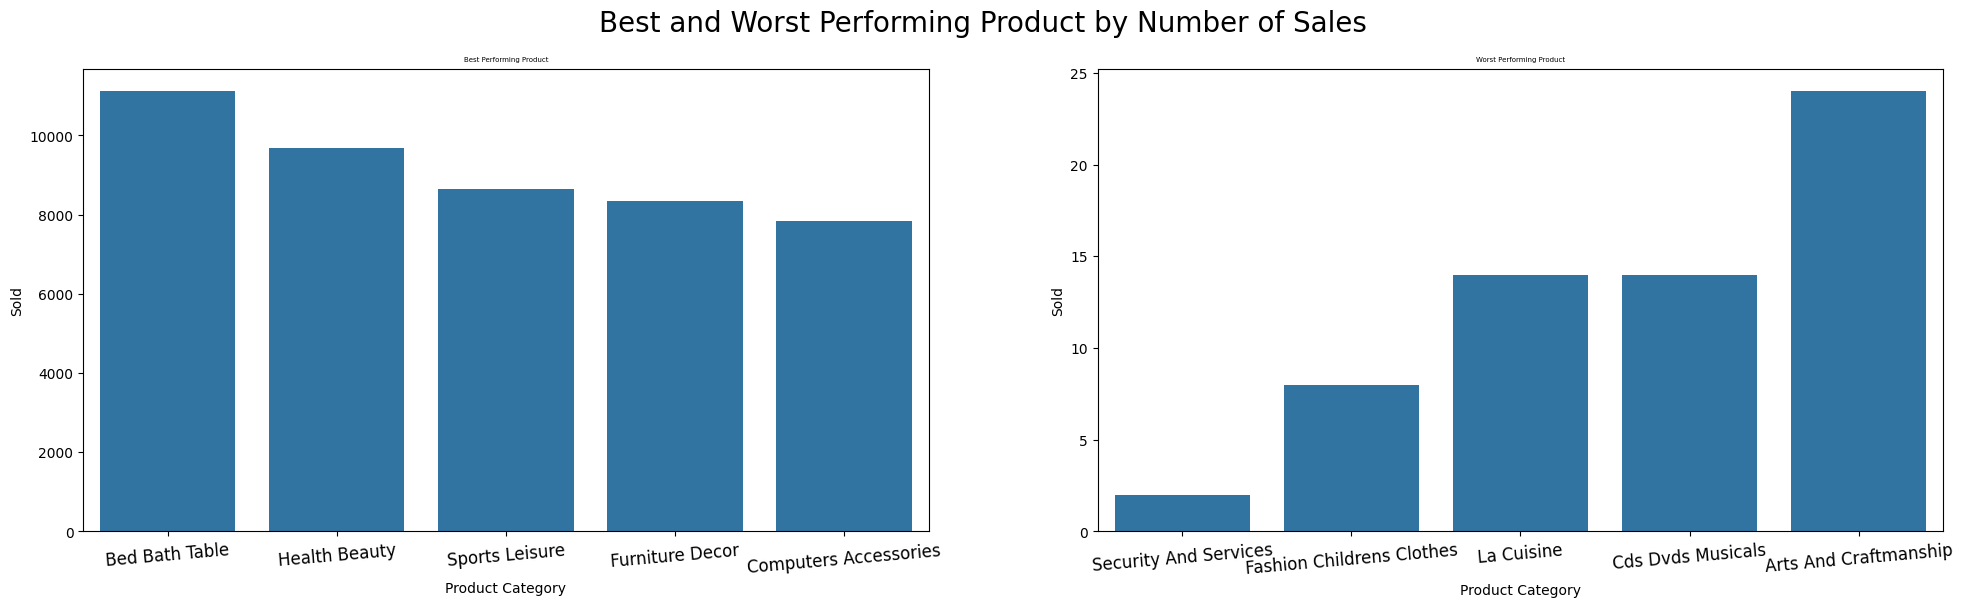

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_df = pd.read_csv("dashboard/main_data.csv")
# all_df.info()

product_counts_df = all_df.groupby("product_category_name_english").agg({
    "product_id": "count",
}).reset_index()
product_counts_df.columns = ["product_category", "sold"]
product_counts_df.product_category = product_counts_df.product_category.apply(lambda x: " ".join(x.split("_")).title())
# product_counts_df.head()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(data=product_counts_df.sort_values(by=["sold"], ascending=False).head(5), y="sold", x="product_category", ax=ax[0])
ax[0].set_ylabel("Sold")
ax[0].set_xlabel("Product Category")
ax[0].set_title("Best Performing Product", loc="center", fontsize=5)
ax[0].tick_params(axis='x', labelsize=12, rotation=5)

sns.barplot(data=product_counts_df.sort_values(by=["sold"], ascending=True).head(5), y="sold", x="product_category", ax=ax[1])
ax[1].set_ylabel("Sold")
ax[1].set_xlabel("Product Category")
ax[1].set_title("Worst Performing Product", loc="center", fontsize=5)
ax[1].tick_params(axis='x', labelsize=12, rotation=5)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**

Kategori produk apa yang paling banyak dan paling sedikit terjual?
- Untuk menjawab pertanyaan ini, diperlukan pengelompokan data berdasarkan `product_category_name_english` dan dihitung nilai `sold` dari masing-masing kategori produk (berdasarkan `product_id`)
- Data yang sudah digrupkan kemudian disajikan dalam bentuk `barplot`, data diurutkan sesuai kebutuhan (*best* & *worst*)

### Pertanyaan 3:

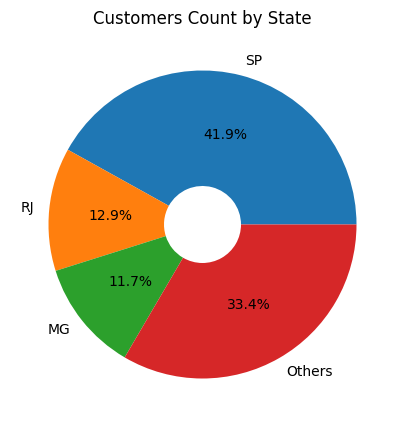

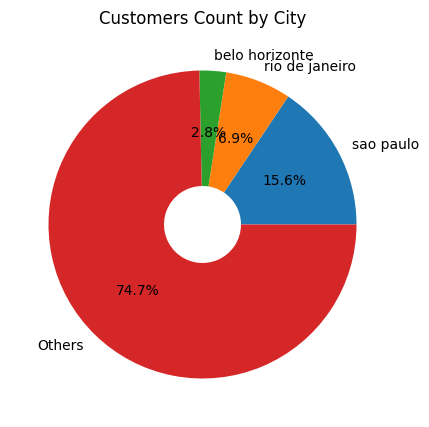

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_df = pd.read_csv("dashboard/main_data.csv")
# all_df.info()

def vis_data(s, S, title):
  customer_counts_df = all_df.groupby(f"customer_{s}").agg({
      "customer_id": "nunique",
  }).reset_index()
  customer_counts_df.columns = [S, "Customers"]
  customer_counts_df.sort_values(by="Customers", ascending=False, inplace=True)

  top_3_df = customer_counts_df[:3].copy()

  others_df = pd.DataFrame({
      S: ['Others'],
      'Customers': [customer_counts_df[3:]["Customers"].sum()]
  })

  final_df = pd.concat([top_3_df, others_df], ignore_index=True)

  plt.figure(figsize=(5, 5))
  plt.title(title)
  plt.pie(
      x=final_df["Customers"],
      labels=final_df[S],
      autopct='%1.1f%%',
      wedgeprops = {'width': .75}
  )

vis_data("state", "State", "Customers Count by State")
vis_data("city", "City", "Customers Count by City")
plt.show()

**Insight:**

Bagaimana demografi pelanggan yang Olist E-Commerce miliki?
- Untuk menjawab pertanyaan ini, diperlukan pengelompokan data berdasarkan `customer_state` ataupun `customer_city` dan dihitung nilai `Customers` dari masing-masing *state/city* (berdasarkan `customer_id`)
- Kemudian dari data tersebut diurutkan dari yang tertinggi ke yang paling rendah.
- Tiga data teratas akan diambil, dan sisanya akan disatukan menjadi satu label yaitu *Others*
- Data yang sudah digrupkan kemudian disajikan dalam bentuk `pie` *chart*

## Analisis Lanjutan (Opsional)

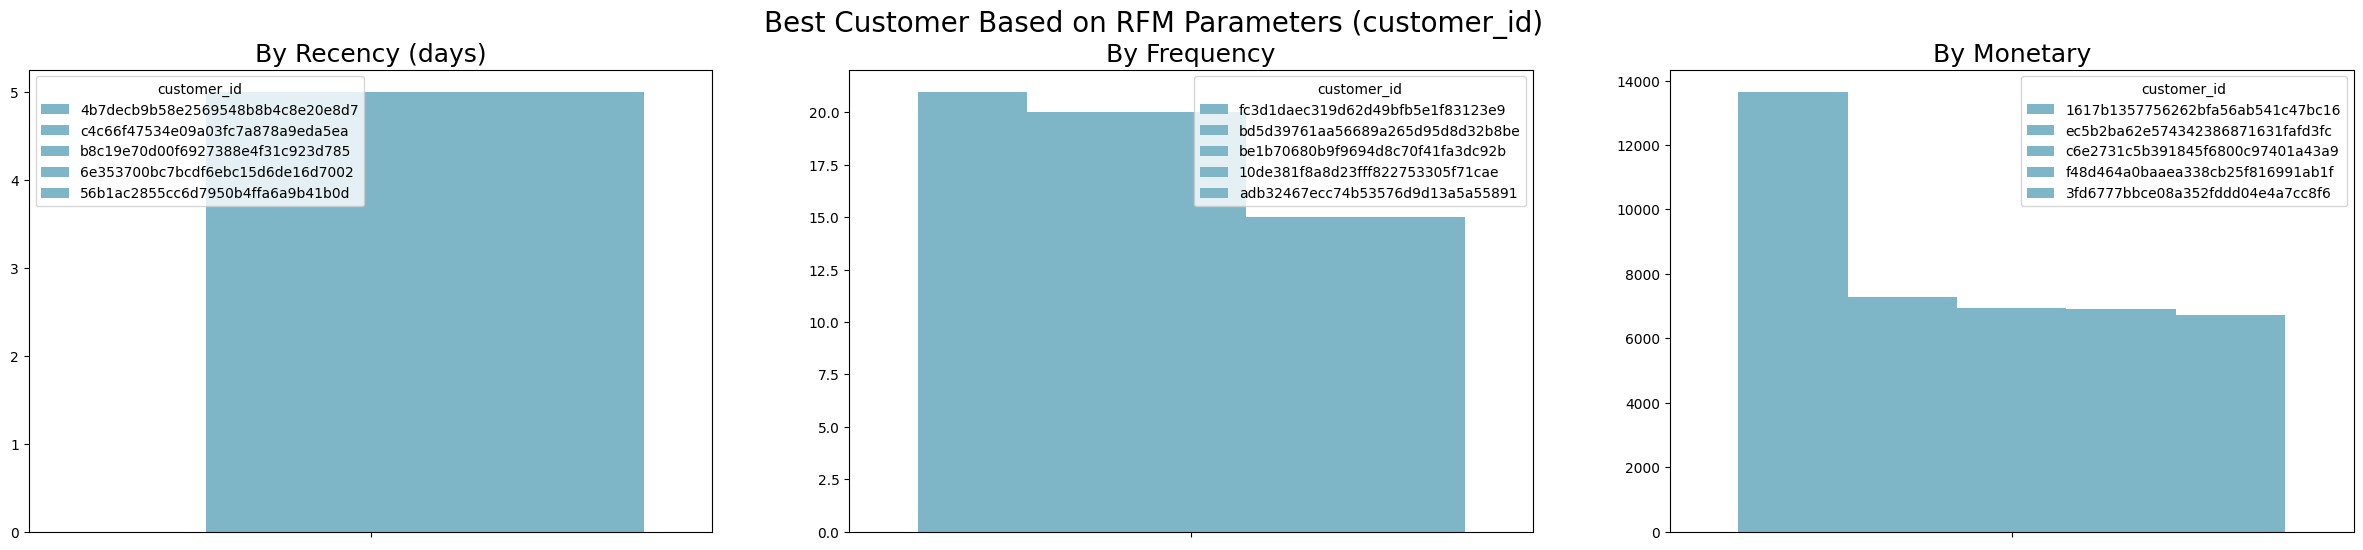

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_df = pd.read_csv("dashboard/main_data.csv")
# all_df.info()

datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_columns:
  all_df[column] = pd.to_datetime(all_df[column])

rfm_df = all_df.groupby(by="customer_id").agg({
    "order_purchase_timestamp": "max",
    "order_id": "count",
    "price": "sum",
    "freight_value": "sum",
}).reset_index()
# rfm_df.head()
rfm_df["revenue"] = rfm_df["price"] + rfm_df["freight_value"]
rfm_df.drop(["price", "freight_value"], axis=1, inplace=True)
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
# mencari tahu berapa hari terakhir pelanggan melakukan pemesanan
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
# rfm_df.info()
# rfm_df.head()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", hue="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", hue="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", hue="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**

**RFM Analysis**, bertujuan mengelompokkan **customer** Olist E-Commerce berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
- **Recency:** Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- **Frequency:** Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode 2016-2018.
- **Monetary:** Menghitung total pengeluaran pelanggan dalam periode 2016-2018.

## Conclusion

1. Bagaimana performa penjualan dan revenue Olist E-Commerce dalam beberapa bulan terakhir?
  - **Performa penjualan** *terbaik* terjadi pada bulan **November 2017**
  - **Performa penjualan** *terburuk* terjadi pada bulan **Desember 2016**
  - **Revenue perusahaan** *terbaik* terjadi pada bulan **November 2017**
  - **Revenue penjualan** *terburuk* terjadi pada bulan **Desember 2016**
2. Kategori produk apa yang paling banyak dan paling sedikit terjual?
  - **Kategori produk** *paling banyak* terjual adalah **Bed Bath Table**
  - **Kategori produk** *paling sedikit* terjual adalah **Security And Services**
3. Bagaimana demografi pelanggan yang Olist E-Commerce miliki?
  - **State** dengan pengguna paling banyak adalah **SP**
  - **City** dengan pengguna paling banyak adalah **sao paulo**
